In [1]:
import sys
import os
import torch

sys.path.append(os.path.abspath('..')) #so we can import for the dir above

from SimpleCNN import SimpleCNN
from RegNet import RegNet
from eval_in_time_domain import eval_in_time_domain

In [2]:
RECODING_TO_EVAL_ON = '/home/kuba/Documents/data/raw/kuba_watch_data/2024-07-10_06_42_46'
PATH_TO_BOUT_DIR = '/home/kuba/Documents/data/raw/listerine/3_final'


WINDOW_SIZE = 400
STRIDE = 50
CONFIDANCE_THRESHOLD = 0.95
OVERLAP_THRESHOLD = 0.85
MIN_BOUT_LEN = 400
NUM_BOUT_TO_SAMP = 20
DEVICE = 'cuda:0'

We will compare with out best model yet the model00 regnet for week2 dir 00_no_movmetn

WARNING we will sample bouts from all participants there will be data leakage, unless you specify who not to sample from
Bout shape - Acc: 400, Gyro: 400
Bout shape - Acc: 519, Gyro: 519
Bout shape - Acc: 455, Gyro: 455
Bout shape - Acc: 594, Gyro: 594
Bout shape - Acc: 615, Gyro: 615
Bout shape - Acc: 510, Gyro: 510
Bout shape - Acc: 449, Gyro: 449
Bout shape - Acc: 594, Gyro: 594
Bout shape - Acc: 520, Gyro: 520
Bout shape - Acc: 419, Gyro: 419
Bout shape - Acc: 650, Gyro: 650
Bout shape - Acc: 426, Gyro: 426
Bout shape - Acc: 420, Gyro: 420
Bout shape - Acc: 430, Gyro: 430
Bout shape - Acc: 628, Gyro: 628
Bout shape - Acc: 471, Gyro: 471
Bout shape - Acc: 524, Gyro: 524
Bout shape - Acc: 410, Gyro: 410
Bout shape - Acc: 400, Gyro: 400
Bout shape - Acc: 421, Gyro: 421
The recording partitioned into windows has shape of: torch.Size([51912, 6, 400])


/home/kuba/.virenv/base/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


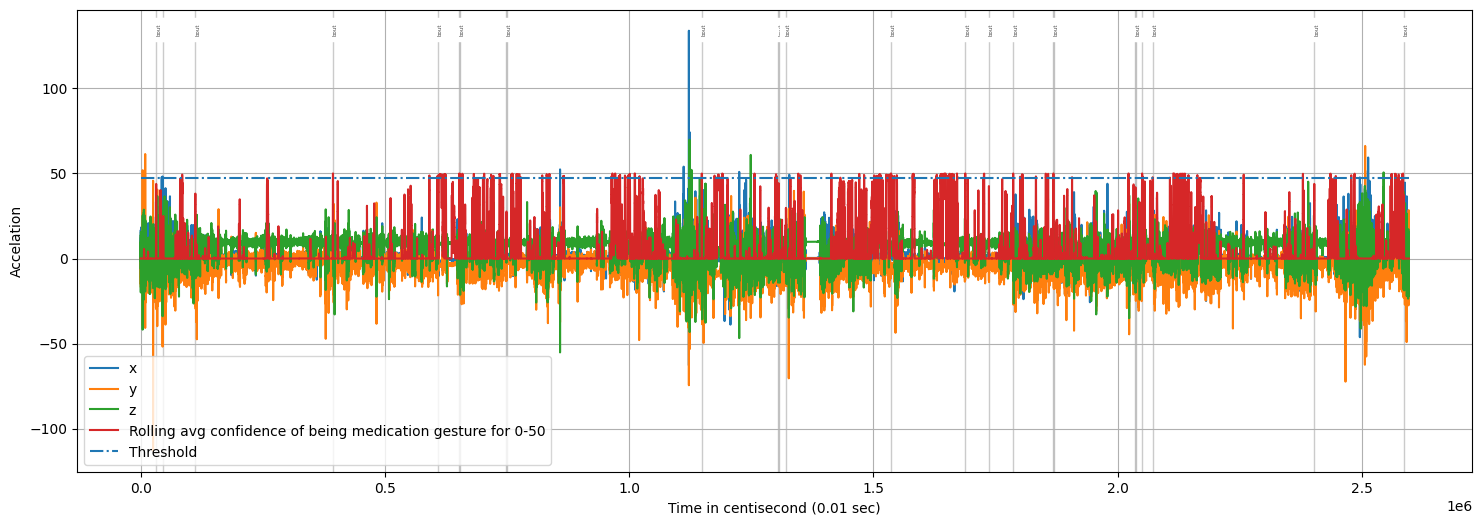

There are 121 FP's of 130 total peaks (confidance over: 0.95 and does not overlap with bout threshold:0.85)
FP's are at rate of 93.08%
TP's are at rate of 6.9231%
Out of 20 model found 9 (45.00)
Normalized on True


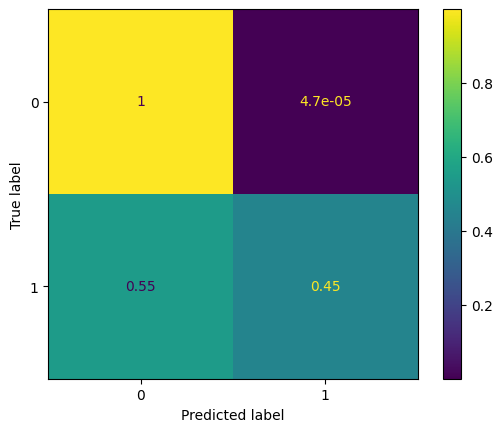

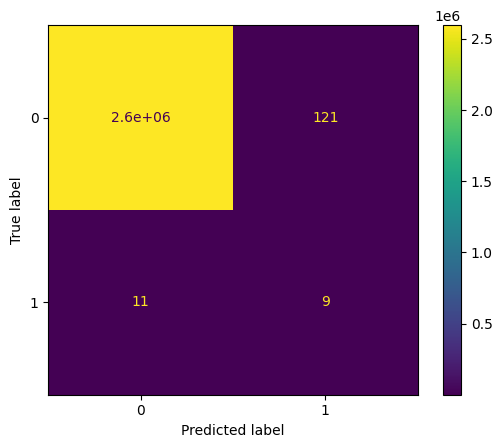

In [3]:
#load model00
model00_path = '/home/kuba/projects/medication-taking-data/new_start/week02/00_no_movment/94f1_with_filter_noMovmets.pth'
model = RegNet()
model.load_state_dict(torch.load(model00_path))

#get false postive count

TP, TN, FP, FN, total = eval_in_time_domain(model, path_to_daily_dir=RECODING_TO_EVAL_ON, path_to_bout_dir=PATH_TO_BOUT_DIR, window_size=WINDOW_SIZE, stride=STRIDE, 
                                            confidance_threshold_for_mean=CONFIDANCE_THRESHOLD, overlap_threshold=OVERLAP_THRESHOLD, min_bout_len=MIN_BOUT_LEN, 
                                            num_bouts_to_samp=NUM_BOUT_TO_SAMP, device=DEVICE)


WARNING we will sample bouts from all participants there will be data leakage, unless you specify who not to sample from
Bout shape - Acc: 733, Gyro: 733
Bout shape - Acc: 724, Gyro: 724
Bout shape - Acc: 416, Gyro: 416
Bout shape - Acc: 521, Gyro: 521
Bout shape - Acc: 495, Gyro: 495
Bout shape - Acc: 497, Gyro: 497
Bout shape - Acc: 471, Gyro: 471
Bout shape - Acc: 466, Gyro: 466
Bout shape - Acc: 720, Gyro: 720
Bout shape - Acc: 418, Gyro: 418
Bout shape - Acc: 594, Gyro: 594
Bout shape - Acc: 687, Gyro: 687
Bout shape - Acc: 594, Gyro: 594
Bout shape - Acc: 440, Gyro: 440
Bout shape - Acc: 509, Gyro: 509
Bout shape - Acc: 732, Gyro: 732
Bout shape - Acc: 500, Gyro: 500
Bout shape - Acc: 628, Gyro: 628
Bout shape - Acc: 625, Gyro: 625
Bout shape - Acc: 439, Gyro: 439
The recording partitioned into windows has shape of: torch.Size([51912, 6, 400])


/home/kuba/.virenv/base/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


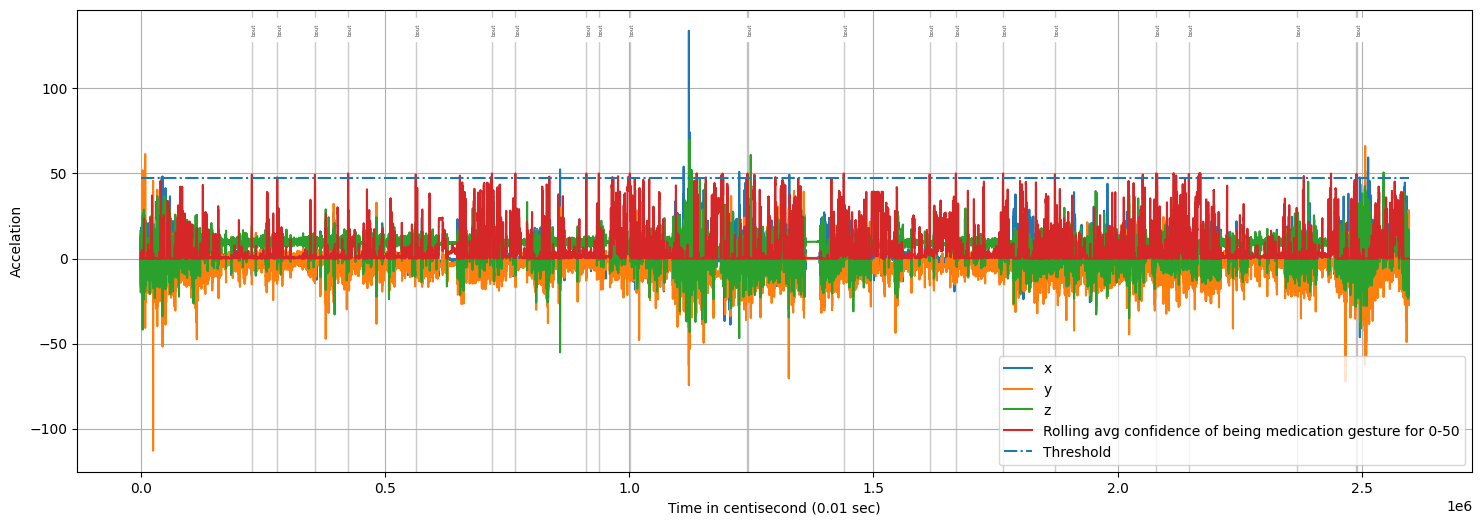

There are 22 FP's of 40 total peaks (confidance over: 0.95 and does not overlap with bout threshold:0.85)
FP's are at rate of 55.00%
TP's are at rate of 45.0000%
Out of 20 model found 18 (90.00)
Normalized on True


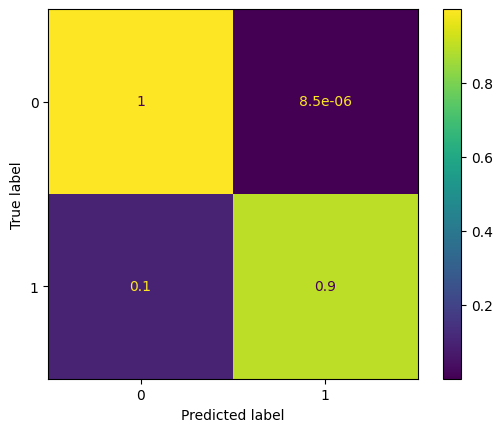

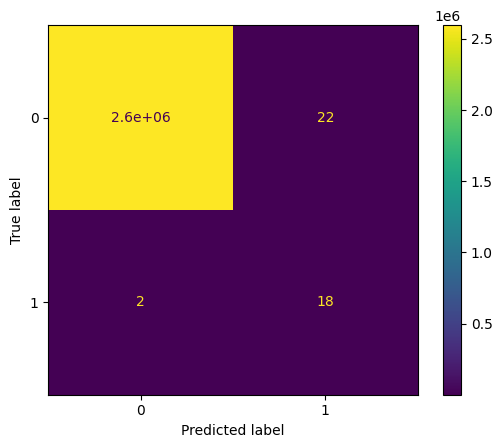

In [4]:
#load model01
model01_path = '/home/kuba/projects/medication-taking-data/new_start/week03/00_no_movment/95f1_with_filter_NOMovments_simpcnn.pth'
model = SimpleCNN()
model.load_state_dict(torch.load(model01_path))
#get false postive count
TP, TN, FP, FN, total = eval_in_time_domain(model, path_to_daily_dir=RECODING_TO_EVAL_ON, path_to_bout_dir=PATH_TO_BOUT_DIR, window_size=WINDOW_SIZE, stride=STRIDE, 
                                            confidance_threshold_for_mean=CONFIDANCE_THRESHOLD, overlap_threshold=OVERLAP_THRESHOLD, min_bout_len=MIN_BOUT_LEN, 
                                            num_bouts_to_samp=NUM_BOUT_TO_SAMP, device=DEVICE)

Lets go our best model yet!!!!!